# Objectives

Primary Objective:
* Use ensemble methods to determine feature importances of a successful App (high # of downloads, high Ratings)

Secondary Objectives:



## Data

Dataset comes from Kaggle and contains information on 10,000+ apps scraped from the Google Play Store in 2018.  It includes the following information:

* App Names
* Category and Genres
* Rating of the app (in 2018)
* Number of Reviews
* Storage Space required
* Minimum Estimates of downloads 
* Free or Paid Service 
* Price
* Content Rating (ESRB)
* Date of the Last Update
* Current Version of App 
* Android OS Compatibility



# Preprocessing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
df = pd.read_csv('googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## NaN Values

In [3]:
df.isna().any()

App               False
Category          False
Rating             True
Reviews           False
Size              False
Installs          False
Type               True
Price             False
Content Rating     True
Genres            False
Last Updated      False
Current Ver        True
Android Ver        True
dtype: bool

Missing values in `Rating`, `Type`, `Content Rating`, `Current Ver`, `Android Ver`.

In [4]:
# Subsetting NaN columns
nan = df[['Rating', 'Type', 'Content Rating', 'Current Ver', 'Android Ver']]
nan

,Rating,Type,Content Rating,Current Ver,Android Ver
0,4.1,Free,Everyone,1.0.0,4.0.3 and up
1,3.9,Free,Everyone,2.0.0,4.0.3 and up
2,4.7,Free,Everyone,1.2.4,4.0.3 and up
3,4.5,Free,Teen,Varies with device,4.2 and up
4,4.3,Free,Everyone,1.1,4.4 and up
...,...,...,...,...,...
10836,4.5,Free,Everyone,1.48,4.1 and up
10837,5.0,Free,Everyone,1.0,4.1 and up
10838,NaN,Free,Everyone,1.0,2.2 and up
10839,4.5,Free,Mature 17+,Varies with device,Varies with device


In [5]:
# Calculate the number of NaN values
for col in nan.columns:
    na_count = nan[col].isna().sum()
    print(f"{col} has {na_count} NaN values")

Rating has 1474 NaN values
Type has 1 NaN values
Content Rating has 1 NaN values
Current Ver has 8 NaN values
Android Ver has 3 NaN values


`Rating` has **roughly 10%** of data missing, **other NaN values are negligible** and can be **dropped**. 

### Addressing NaNs in Ratings  

First question to answer is: Why are the ratings missing? Is there a pattern?

In [6]:
# checking genres and titles associated with NaN Ratings
rating = df[['App', 'Category', 'Genres', 'Rating', 'Installs']]
rating = rating[rating.Rating.isna() == True]

In [7]:
rating.head()

,App,Category,Genres,Rating,Installs
23,Mcqueen Coloring pages,ART_AND_DESIGN,Art & Design;Action & Adventure,NaN,"100,000+"
113,Wrinkles and rejuvenation,BEAUTY,Beauty,NaN,"100,000+"
123,Manicure - nail design,BEAUTY,Beauty,NaN,"50,000+"
126,Skin Care and Natural Beauty,BEAUTY,Beauty,NaN,"100,000+"
129,"Secrets of beauty, youth and health",BEAUTY,Beauty,NaN,"10,000+"


In [8]:
# Checking # of Downloads
rating.Installs.value_counts()

100+          410
10+           317
1,000+        194
50+           149
500+          129
5+             73
1+             64
5,000+         45
10,000+        44
100,000+       19
0+             14
50,000+        12
1,000,000+      2
500,000+        1
0               1
Name: Installs, dtype: int64

Missing data not a result of number of installs

In [9]:
# Checking for patterns in Categories
rating.Category.value_counts()

FAMILY                 225
BUSINESS               157
MEDICAL                113
TOOLS                  109
PERSONALIZATION         78
PRODUCTIVITY            73
LIFESTYLE               68
SPORTS                  65
COMMUNICATION           59
BOOKS_AND_REFERENCE     53
NEWS_AND_MAGAZINES      50
GAME                    47
HEALTH_AND_FITNESS      44
FINANCE                 43
DATING                  39
SOCIAL                  36
TRAVEL_AND_LOCAL        32
SHOPPING                22
LIBRARIES_AND_DEMO      20
EVENTS                  19
PHOTOGRAPHY             18
FOOD_AND_DRINK          18
VIDEO_PLAYERS           15
MAPS_AND_NAVIGATION     13
AUTO_AND_VEHICLES       12
HOUSE_AND_HOME          12
BEAUTY                  11
PARENTING               10
WEATHER                  7
ART_AND_DESIGN           3
COMICS                   2
EDUCATION                1
Name: Category, dtype: int64

**NaNs aren't result of specific categories**. Some categories are missing more than others, but all categories have at least 1 missing value.

In [10]:
# Checking Genres
rating.Genres.value_counts()

Business                           157
Medical                            113
Tools                              109
Entertainment                       90
Education                           81
Personalization                     78
Productivity                        73
Lifestyle                           68
Sports                              65
Communication                       59
Books & Reference                   53
News & Magazines                    50
Health & Fitness                    44
Finance                             43
Dating                              39
Social                              36
Travel & Local                      32
Shopping                            22
Libraries & Demo                    20
Puzzle                              19
Events                              19
Food & Drink                        18
Photography                         18
Video Players & Editors             15
Maps & Navigation                   13
Arcade                   

No pattern found in Genres.

**Missing values are most likely MCAR** (Missing Completely at Random).

## The Plan

We could use KNN Imputation, but that would require us to label encode all of our other data.  While we will want to do this in the end, it's not ideal to do before EDA.  So for modeling we'll do KNN Imputation, but for EDA we'll impute the median rating with respects to the app's `Category`. 

In [11]:
# Getting list of categories

category = list(df.Category.unique())
category

['ART_AND_DESIGN',
 'AUTO_AND_VEHICLES',
 'BEAUTY',
 'BOOKS_AND_REFERENCE',
 'BUSINESS',
 'COMICS',
 'COMMUNICATION',
 'DATING',
 'EDUCATION',
 'ENTERTAINMENT',
 'EVENTS',
 'FINANCE',
 'FOOD_AND_DRINK',
 'HEALTH_AND_FITNESS',
 'HOUSE_AND_HOME',
 'LIBRARIES_AND_DEMO',
 'LIFESTYLE',
 'GAME',
 'FAMILY',
 'MEDICAL',
 'SOCIAL',
 'SHOPPING',
 'PHOTOGRAPHY',
 'SPORTS',
 'TRAVEL_AND_LOCAL',
 'TOOLS',
 'PERSONALIZATION',
 'PRODUCTIVITY',
 'PARENTING',
 'WEATHER',
 'VIDEO_PLAYERS',
 'NEWS_AND_MAGAZINES',
 'MAPS_AND_NAVIGATION',
 '1.9']

In [12]:
# Creating for loop for imputation
error = 0

for i in range(len(df['Rating'])):
    if np.isnan(df['Rating'][i]) == True:
        for cat in range(len(category)):
            if df['Category'][i] == category[cat]:
                edf = df[df['Category'] == category[cat]]
                median = edf.Rating.median()
                print(df['Rating'][i])
                df['Rating'][i] = str(df['Rating'][i]).replace(str(df['Rating'][i]), str(median))
                print(df['Rating'][i])
    else:
        print('No NaN', error)
        error += 1

No NaN 0
No NaN 1
No NaN 2
No NaN 3
No NaN 4
No NaN 5
No NaN 6
No NaN 7
No NaN 8
No NaN 9
No NaN 10
No NaN 11
No NaN 12
No NaN 13
No NaN 14
No NaN 15
No NaN 16
No NaN 17
No NaN 18
No NaN 19
No NaN 20
No NaN 21
No NaN 22
nan
4.4
No NaN 23
No NaN 24
No NaN 25
No NaN 26
No NaN 27
No NaN 28
No NaN 29
No NaN 30
No NaN 31
No NaN 32
No NaN 33
No NaN 34
No NaN 35
No NaN 36
No NaN 37
No NaN 38
No NaN 39
No NaN 40
No NaN 41
No NaN 42
No NaN 43
No NaN 44
No NaN 45
No NaN 46
No NaN 47
No NaN 48
No NaN 49
No NaN 50
No NaN 51
No NaN 52
No NaN 53
No NaN 54
No NaN 55
No NaN 56
No NaN 57
No NaN 58
No NaN 59
No NaN 60
No NaN 61
No NaN 62
No NaN 63
No NaN 64
No NaN 65
No NaN 66
No NaN 67
No NaN 68
No NaN 69
No NaN 70
No NaN 71
No NaN 72
No NaN 73
No NaN 74
No NaN 75
No NaN 76
No NaN 77
No NaN 78
No NaN 79
No NaN 80
No NaN 81
No NaN 82
No NaN 83
No NaN 84
No NaN 85
No NaN 86
No NaN 87
No NaN 88
No NaN 89
No NaN 90
No NaN 91
No NaN 92
No NaN 93
No NaN 94
No NaN 95
No NaN 96
No NaN 97
No NaN 98
No NaN 99
No

No NaN 943
No NaN 944
No NaN 945
No NaN 946
No NaN 947
No NaN 948
No NaN 949
No NaN 950
No NaN 951
No NaN 952
No NaN 953
No NaN 954
No NaN 955
No NaN 956
No NaN 957
No NaN 958
No NaN 959
No NaN 960
nan
4.5
No NaN 961
No NaN 962
No NaN 963
No NaN 964
No NaN 965
No NaN 966
No NaN 967
No NaN 968
No NaN 969
No NaN 970
nan
4.5
nan
4.5
No NaN 971
No NaN 972
No NaN 973
No NaN 974
No NaN 975
No NaN 976
nan
4.5
nan
4.5
nan
4.5
No NaN 977
No NaN 978
No NaN 979
No NaN 980
nan
4.5
No NaN 981
nan
4.5
No NaN 982
nan
4.5
No NaN 983
nan
4.5
nan
4.5
No NaN 984
No NaN 985
No NaN 986
No NaN 987
No NaN 988
No NaN 989
No NaN 990
No NaN 991
No NaN 992
No NaN 993
No NaN 994
No NaN 995
No NaN 996
No NaN 997
No NaN 998
No NaN 999
No NaN 1000
No NaN 1001
No NaN 1002
No NaN 1003
No NaN 1004
No NaN 1005
No NaN 1006
No NaN 1007
No NaN 1008
No NaN 1009
No NaN 1010
No NaN 1011
No NaN 1012
No NaN 1013
No NaN 1014
No NaN 1015
No NaN 1016
No NaN 1017
No NaN 1018
No NaN 1019
No NaN 1020
No NaN 1021
No NaN 1022
No NaN 10

No NaN 2285
No NaN 2286
No NaN 2287
No NaN 2288
No NaN 2289
No NaN 2290
No NaN 2291
No NaN 2292
No NaN 2293
No NaN 2294
No NaN 2295
No NaN 2296
No NaN 2297
No NaN 2298
No NaN 2299
No NaN 2300
No NaN 2301
No NaN 2302
nan
4.3
No NaN 2303
No NaN 2304
No NaN 2305
No NaN 2306
No NaN 2307
No NaN 2308
No NaN 2309
No NaN 2310
No NaN 2311
No NaN 2312
No NaN 2313
No NaN 2314
No NaN 2315
No NaN 2316
No NaN 2317
No NaN 2318
No NaN 2319
No NaN 2320
No NaN 2321
No NaN 2322
No NaN 2323
No NaN 2324
No NaN 2325
No NaN 2326
No NaN 2327
No NaN 2328
No NaN 2329
No NaN 2330
nan
4.3
No NaN 2331
No NaN 2332
nan
4.3
nan
4.3
nan
4.3
nan
4.3
No NaN 2333
No NaN 2334
No NaN 2335
No NaN 2336
nan
4.3
nan
4.3
nan
4.3
nan
4.3
nan
4.3
nan
4.3
nan
4.3
nan
4.3
nan
4.3
nan
4.3
nan
4.3
nan
4.3
nan
4.3
nan
4.3
No NaN 2337
No NaN 2338
nan
4.3
nan
4.3
No NaN 2339
nan
4.3
No NaN 2340
nan
4.3
No NaN 2341
nan
4.3
No NaN 2342
No NaN 2343
nan
4.3
No NaN 2344
No NaN 2345
No NaN 2346
nan
4.3
nan
4.3
nan
4.3
No NaN 2347
No NaN 2348


nan
4.4
No NaN 3440
No NaN 3441
No NaN 3442
nan
4.4
No NaN 3443
No NaN 3444
No NaN 3445
No NaN 3446
No NaN 3447
No NaN 3448
No NaN 3449
No NaN 3450
No NaN 3451
nan
4.4
No NaN 3452
No NaN 3453
No NaN 3454
nan
4.4
No NaN 3455
No NaN 3456
No NaN 3457
No NaN 3458
No NaN 3459
No NaN 3460
No NaN 3461
No NaN 3462
No NaN 3463
No NaN 3464
No NaN 3465
No NaN 3466
nan
4.4
No NaN 3467
No NaN 3468
No NaN 3469
No NaN 3470
nan
4.4
No NaN 3471
No NaN 3472
No NaN 3473
No NaN 3474
No NaN 3475
No NaN 3476
No NaN 3477
No NaN 3478
No NaN 3479
No NaN 3480
No NaN 3481
No NaN 3482
No NaN 3483
No NaN 3484
No NaN 3485
No NaN 3486
No NaN 3487
No NaN 3488
No NaN 3489
No NaN 3490
No NaN 3491
No NaN 3492
No NaN 3493
No NaN 3494
No NaN 3495
No NaN 3496
No NaN 3497
No NaN 3498
No NaN 3499
No NaN 3500
No NaN 3501
No NaN 3502
No NaN 3503
No NaN 3504
No NaN 3505
No NaN 3506
No NaN 3507
No NaN 3508
No NaN 3509
No NaN 3510
No NaN 3511
No NaN 3512
No NaN 3513
No NaN 3514
No NaN 3515
No NaN 3516
No NaN 3517
No NaN 3518
No N

No NaN 4497
No NaN 4498
No NaN 4499
No NaN 4500
nan
4.3
No NaN 4501
No NaN 4502
No NaN 4503
No NaN 4504
No NaN 4505
No NaN 4506
No NaN 4507
No NaN 4508
No NaN 4509
No NaN 4510
No NaN 4511
No NaN 4512
No NaN 4513
No NaN 4514
No NaN 4515
No NaN 4516
No NaN 4517
No NaN 4518
No NaN 4519
No NaN 4520
No NaN 4521
No NaN 4522
No NaN 4523
No NaN 4524
No NaN 4525
No NaN 4526
No NaN 4527
No NaN 4528
No NaN 4529
No NaN 4530
No NaN 4531
No NaN 4532
No NaN 4533
No NaN 4534
No NaN 4535
No NaN 4536
No NaN 4537
No NaN 4538
No NaN 4539
No NaN 4540
No NaN 4541
No NaN 4542
No NaN 4543
No NaN 4544
No NaN 4545
No NaN 4546
No NaN 4547
No NaN 4548
No NaN 4549
No NaN 4550
No NaN 4551
No NaN 4552
No NaN 4553
No NaN 4554
No NaN 4555
No NaN 4556
No NaN 4557
No NaN 4558
No NaN 4559
No NaN 4560
No NaN 4561
No NaN 4562
No NaN 4563
No NaN 4564
No NaN 4565
No NaN 4566
No NaN 4567
No NaN 4568
No NaN 4569
No NaN 4570
No NaN 4571
No NaN 4572
No NaN 4573
No NaN 4574
No NaN 4575
No NaN 4576
No NaN 4577
No NaN 4578
nan
4.4


nan
4.4
No NaN 5466
No NaN 5467
No NaN 5468
No NaN 5469
No NaN 5470
No NaN 5471
No NaN 5472
nan
4.3
nan
4.2
nan
4.4
nan
4.3
No NaN 5473
nan
4.3
nan
4.4
nan
4.2
nan
4.2
nan
4.4
No NaN 5474
nan
4.3
No NaN 5475
nan
4.5
nan
4.4
No NaN 5476
No NaN 5477
No NaN 5478
No NaN 5479
nan
4.3
No NaN 5480
nan
4.2
nan
4.3
nan
4.4
No NaN 5481
nan
4.3
No NaN 5482
No NaN 5483
No NaN 5484
No NaN 5485
No NaN 5486
No NaN 5487
No NaN 5488
No NaN 5489
No NaN 5490
No NaN 5491
No NaN 5492
No NaN 5493
No NaN 5494
No NaN 5495
No NaN 5496
No NaN 5497
No NaN 5498
No NaN 5499
No NaN 5500
No NaN 5501
No NaN 5502
No NaN 5503
No NaN 5504
No NaN 5505
nan
4.2
No NaN 5506
No NaN 5507
No NaN 5508
No NaN 5509
No NaN 5510
No NaN 5511
No NaN 5512
No NaN 5513
nan
4.2
No NaN 5514
No NaN 5515
No NaN 5516
No NaN 5517
No NaN 5518
No NaN 5519
No NaN 5520
No NaN 5521
No NaN 5522
No NaN 5523
No NaN 5524
No NaN 5525
No NaN 5526
No NaN 5527
No NaN 5528
No NaN 5529
No NaN 5530
No NaN 5531
No NaN 5532
No NaN 5533
No NaN 5534
No NaN 5535


nan
4.3
No NaN 6139
No NaN 6140
No NaN 6141
No NaN 6142
No NaN 6143
nan
4.3
No NaN 6144
No NaN 6145
nan
4.3
nan
4.2
No NaN 6146
nan
4.3
nan
4.3
No NaN 6147
No NaN 6148
nan
4.4
No NaN 6149
nan
4.3
No NaN 6150
nan
4.3
nan
4.2
No NaN 6151
nan
4.2
No NaN 6152
No NaN 6153
No NaN 6154
nan
4.3
nan
4.4
No NaN 6155
No NaN 6156
No NaN 6157
No NaN 6158
No NaN 6159
No NaN 6160
No NaN 6161
No NaN 6162
No NaN 6163
No NaN 6164
No NaN 6165
No NaN 6166
No NaN 6167
No NaN 6168
No NaN 6169
No NaN 6170
No NaN 6171
No NaN 6172
No NaN 6173
No NaN 6174
nan
4.2
nan
4.3
nan
4.4
No NaN 6175
nan
4.3
No NaN 6176
nan
4.4
No NaN 6177
No NaN 6178
No NaN 6179
nan
4.3
nan
4.2
No NaN 6180
No NaN 6181
nan
4.2
No NaN 6182
No NaN 6183
No NaN 6184
nan
4.2
nan
4.2
No NaN 6185
nan
4.3
No NaN 6186
nan
4.3
No NaN 6187
No NaN 6188
No NaN 6189
No NaN 6190
No NaN 6191
No NaN 6192
No NaN 6193
No NaN 6194
No NaN 6195
No NaN 6196
No NaN 6197
No NaN 6198
No NaN 6199
No NaN 6200
No NaN 6201
No NaN 6202
No NaN 6203
No NaN 6204
No NaN 6

nan
4.2
No NaN 6888
nan
4.3
nan
4.3
nan
4.2
No NaN 6889
No NaN 6890
No NaN 6891
No NaN 6892
nan
4.3
nan
4.2
No NaN 6893
No NaN 6894
No NaN 6895
nan
4.3
No NaN 6896
nan
4.3
No NaN 6897
nan
4.3
No NaN 6898
nan
4.2
No NaN 6899
nan
4.3
No NaN 6900
No NaN 6901
nan
4.3
No NaN 6902
nan
4.3
No NaN 6903
No NaN 6904
No NaN 6905
No NaN 6906
No NaN 6907
No NaN 6908
No NaN 6909
nan
4.2
No NaN 6910
nan
4.5
nan
4.3
No NaN 6911
No NaN 6912
No NaN 6913
No NaN 6914
No NaN 6915
No NaN 6916
No NaN 6917
No NaN 6918
nan
4.3
No NaN 6919
nan
4.3
No NaN 6920
No NaN 6921
No NaN 6922
No NaN 6923
No NaN 6924
No NaN 6925
No NaN 6926
No NaN 6927
No NaN 6928
No NaN 6929
No NaN 6930
No NaN 6931
No NaN 6932
No NaN 6933
No NaN 6934
nan
4.2
No NaN 6935
No NaN 6936
nan
4.3
No NaN 6937
No NaN 6938
No NaN 6939
No NaN 6940
No NaN 6941
No NaN 6942
No NaN 6943
No NaN 6944
nan
4.2
No NaN 6945
No NaN 6946
nan
4.3
No NaN 6947
No NaN 6948
No NaN 6949
No NaN 6950
No NaN 6951
No NaN 6952
No NaN 6953
No NaN 6954
No NaN 6955
nan
4.5


4.3
No NaN 7604
nan
4.3
nan
4.3
nan
4.2
No NaN 7605
No NaN 7606
No NaN 7607
No NaN 7608
nan
4.3
No NaN 7609
nan
4.2
No NaN 7610
nan
4.3
No NaN 7611
No NaN 7612
No NaN 7613
No NaN 7614
No NaN 7615
No NaN 7616
No NaN 7617
No NaN 7618
No NaN 7619
No NaN 7620
No NaN 7621
No NaN 7622
No NaN 7623
No NaN 7624
No NaN 7625
No NaN 7626
No NaN 7627
No NaN 7628
No NaN 7629
No NaN 7630
No NaN 7631
No NaN 7632
No NaN 7633
No NaN 7634
No NaN 7635
No NaN 7636
No NaN 7637
No NaN 7638
No NaN 7639
No NaN 7640
No NaN 7641
No NaN 7642
No NaN 7643
No NaN 7644
No NaN 7645
No NaN 7646
No NaN 7647
No NaN 7648
No NaN 7649
No NaN 7650
No NaN 7651
No NaN 7652
No NaN 7653
No NaN 7654
No NaN 7655
No NaN 7656
No NaN 7657
No NaN 7658
No NaN 7659
No NaN 7660
No NaN 7661
No NaN 7662
No NaN 7663
No NaN 7664
No NaN 7665
No NaN 7666
No NaN 7667
No NaN 7668
No NaN 7669
No NaN 7670
No NaN 7671
No NaN 7672
No NaN 7673
No NaN 7674
No NaN 7675
No NaN 7676
No NaN 7677
No NaN 7678
No NaN 7679
No NaN 7680
No NaN 7681
No NaN 7682


nan
4.3
No NaN 8391
No NaN 8392
No NaN 8393
No NaN 8394
No NaN 8395
No NaN 8396
No NaN 8397
No NaN 8398
No NaN 8399
nan
4.4
No NaN 8400
No NaN 8401
No NaN 8402
No NaN 8403
No NaN 8404
No NaN 8405
No NaN 8406
No NaN 8407
No NaN 8408
No NaN 8409
No NaN 8410
No NaN 8411
No NaN 8412
No NaN 8413
No NaN 8414
No NaN 8415
No NaN 8416
No NaN 8417
No NaN 8418
No NaN 8419
No NaN 8420
No NaN 8421
No NaN 8422
No NaN 8423
No NaN 8424
No NaN 8425
No NaN 8426
No NaN 8427
No NaN 8428
No NaN 8429
No NaN 8430
No NaN 8431
No NaN 8432
No NaN 8433
No NaN 8434
No NaN 8435
No NaN 8436
No NaN 8437
No NaN 8438
No NaN 8439
No NaN 8440
No NaN 8441
No NaN 8442
No NaN 8443
nan
4.3
No NaN 8444
No NaN 8445
No NaN 8446
No NaN 8447
No NaN 8448
No NaN 8449
No NaN 8450
No NaN 8451
No NaN 8452
No NaN 8453
No NaN 8454
No NaN 8455
No NaN 8456
No NaN 8457
No NaN 8458
No NaN 8459
No NaN 8460
No NaN 8461
No NaN 8462
No NaN 8463
No NaN 8464
No NaN 8465
No NaN 8466
No NaN 8467
No NaN 8468
No NaN 8469
No NaN 8470
No NaN 8471
No N

nan
4.2
No NaN 9075
nan
4.3
No NaN 9076
No NaN 9077
No NaN 9078
No NaN 9079
nan
4.3
nan
4.3
No NaN 9080
No NaN 9081
No NaN 9082
No NaN 9083
No NaN 9084
nan
4.3
No NaN 9085
No NaN 9086
No NaN 9087
No NaN 9088
No NaN 9089
No NaN 9090
No NaN 9091
No NaN 9092
No NaN 9093
No NaN 9094
No NaN 9095
No NaN 9096
No NaN 9097
No NaN 9098
No NaN 9099
No NaN 9100
No NaN 9101
No NaN 9102
No NaN 9103
No NaN 9104
No NaN 9105
No NaN 9106
No NaN 9107
No NaN 9108
No NaN 9109
No NaN 9110
No NaN 9111
No NaN 9112
No NaN 9113
No NaN 9114
No NaN 9115
No NaN 9116
No NaN 9117
No NaN 9118
No NaN 9119
No NaN 9120
No NaN 9121
No NaN 9122
No NaN 9123
No NaN 9124
No NaN 9125
No NaN 9126
No NaN 9127
nan
4.4
No NaN 9128
nan
4.2
No NaN 9129
No NaN 9130
nan
4.2
No NaN 9131
No NaN 9132
No NaN 9133
No NaN 9134
No NaN 9135
nan
4.4
nan
4.4
nan
4.4
nan
4.4
No NaN 9136
nan
4.4
No NaN 9137
nan
4.4
No NaN 9138
No NaN 9139
No NaN 9140
No NaN 9141
No NaN 9142
No NaN 9143
No NaN 9144
No NaN 9145
nan
4.2
No NaN 9146
No NaN 9147
No N

In [24]:
df.isna().any()

App               False
Category          False
Rating            False
Reviews           False
Size              False
Installs          False
Type               True
Price             False
Content Rating     True
Genres            False
Last Updated      False
Current Ver        True
Android Ver        True
dtype: bool

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          10841 non-null  float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


Ratings are all filled up. Now we'll drop the rest of the NaN values

In [26]:
cleaned_df = df.dropna()
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10829 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10829 non-null  object 
 1   Category        10829 non-null  object 
 2   Rating          10829 non-null  float64
 3   Reviews         10829 non-null  object 
 4   Size            10829 non-null  object 
 5   Installs        10829 non-null  object 
 6   Type            10829 non-null  object 
 7   Price           10829 non-null  object 
 8   Content Rating  10829 non-null  object 
 9   Genres          10829 non-null  object 
 10  Last Updated    10829 non-null  object 
 11  Current Ver     10829 non-null  object 
 12  Android Ver     10829 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


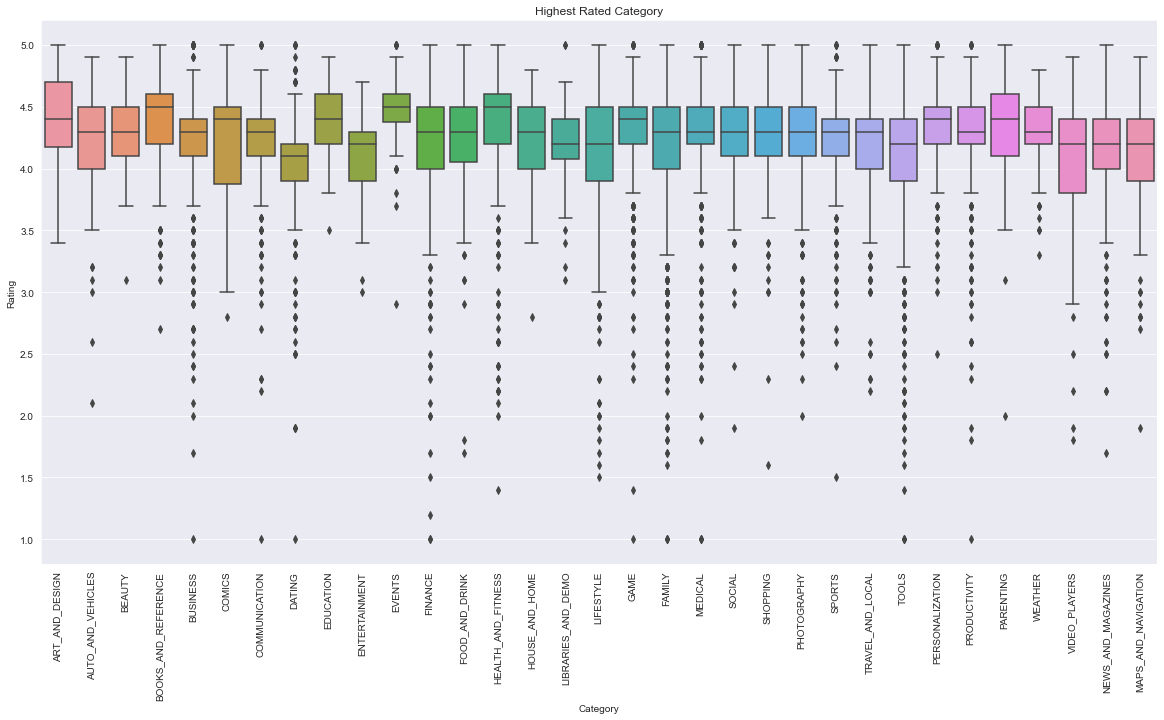

In [27]:
categ = cleaned_df.Category
rate = cleaned_df.Rating
dls = cleaned_df.Installs

fig = plt.figure(figsize = (20, 10))
sns.boxplot(x=categ, y=rate)
plt.xticks(rotation=90)
plt.title('Highest Rated Category')
plt.show();

In [28]:
# Remove everything below 2.5 

def outlier_treatment(df_column):
    sorted(df_column)
    Q1, Q3 = np.percentile(df_column, [25, 75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5*IQR)
    upper_range = Q3 - (1.5*IQR)
    return lower_range, upper_range

lower, upper = outlier_treatment(drop_df.Rating)

rating_cln = drop_df[drop_df.Rating >= lower]
rate1 = rating_cln.Rating

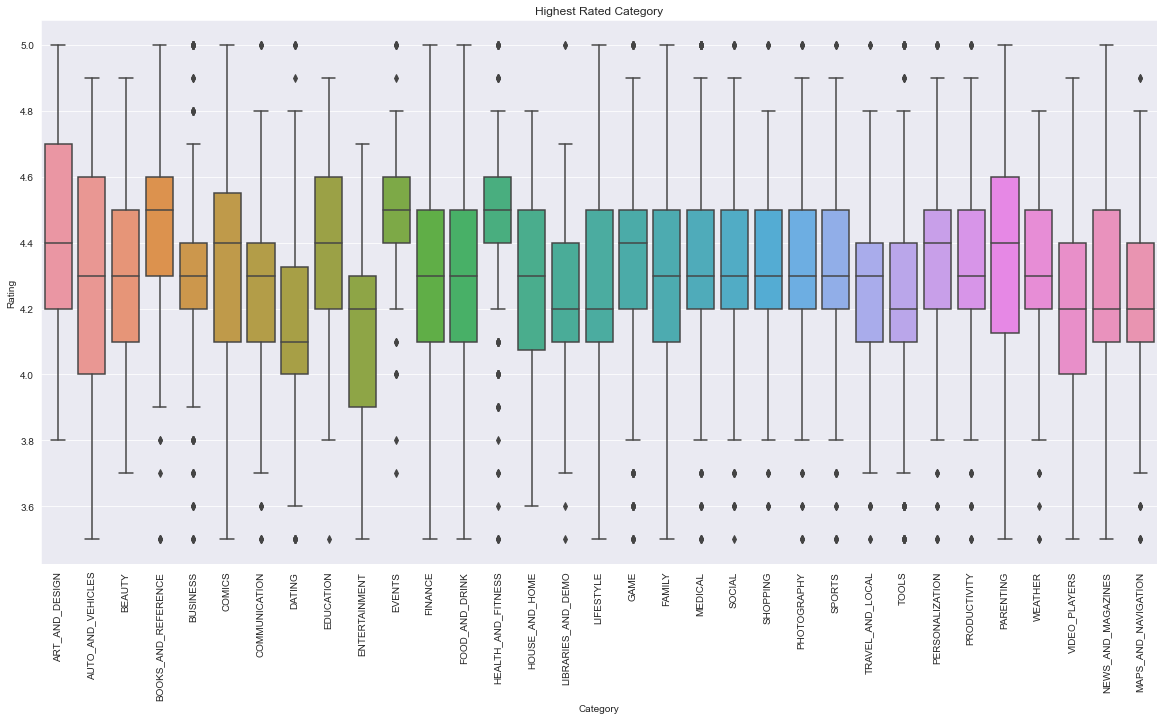

In [29]:
fig = plt.figure(figsize = (20, 10))
sns.boxplot(x=categ, y=rate1)
plt.xticks(rotation=90)
plt.title('Highest Rated Category')
plt.show();

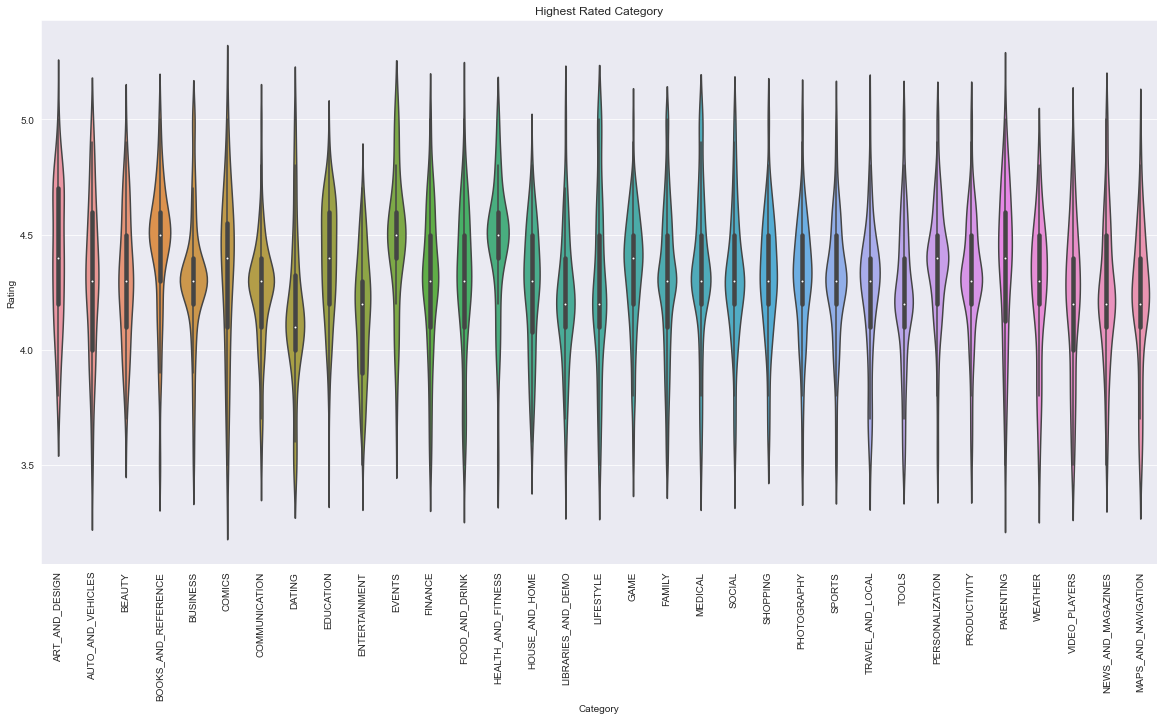

In [30]:
fig = plt.figure(figsize = (20, 10))
sns.violinplot(x=categ, y=rate1)
plt.xticks(rotation=90)
plt.title('Highest Rated Category')
plt.show();

In [31]:
# turn Installs to floats

# replacing '+' and ',' values
cleaned_df['Installs'] = cleaned_df['Installs'].str.replace('+', '')
cleaned_df['Installs'] = cleaned_df['Installs'].str.replace(',', '')
cleaned_df['Installs'] = cleaned_df['Installs'].astype(float)
cleaned_df.Installs.head()

0       10000.0
1      500000.0
2     5000000.0
3    50000000.0
4      100000.0
Name: Installs, dtype: float64

# Create New DataFrame for Categories

In [21]:
cat = pd.DataFrame(drop_df['Category'].unique())
cat = cat.rename(columns={0 : 'category'})
cat.head()

,category
0,ART_AND_DESIGN
1,AUTO_AND_VEHICLES
2,BEAUTY
3,BOOKS_AND_REFERENCE
4,BUSINESS


In [22]:
cats = list(drop_df['Category'].unique())

cats

['ART_AND_DESIGN',
 'AUTO_AND_VEHICLES',
 'BEAUTY',
 'BOOKS_AND_REFERENCE',
 'BUSINESS',
 'COMICS',
 'COMMUNICATION',
 'DATING',
 'EDUCATION',
 'ENTERTAINMENT',
 'EVENTS',
 'FINANCE',
 'FOOD_AND_DRINK',
 'HEALTH_AND_FITNESS',
 'HOUSE_AND_HOME',
 'LIBRARIES_AND_DEMO',
 'LIFESTYLE',
 'GAME',
 'FAMILY',
 'MEDICAL',
 'SOCIAL',
 'SHOPPING',
 'PHOTOGRAPHY',
 'SPORTS',
 'TRAVEL_AND_LOCAL',
 'TOOLS',
 'PERSONALIZATION',
 'PRODUCTIVITY',
 'PARENTING',
 'WEATHER',
 'VIDEO_PLAYERS',
 'NEWS_AND_MAGAZINES',
 'MAPS_AND_NAVIGATION']

In [23]:
for i in range(len(cats)):
    cdf = drop_df[drop_df['Category' == cats[i]]]
    sum_ = ef.Installs.sum()
    print(f"{cats[i]} has over {sum_} downloads")
        

KeyError: False